<a href="https://colab.research.google.com/github/mia1996/rlcard-tutoirial/blob/master/leduc_holdem_cfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Training CFR on Leduc Hold'em**
In this tutorial, we will showcase a more advanced algorithm CFR, which uses `step` and `step_back` to traverse the game tree.

First, we install RLcard and PyTorch.

In [1]:
!pip install rlcard[torch]

     |████████████████████████████████| 268 kB 3.0 MB/s 
     |████████████████████████████████| 181 kB 45.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for rlcard: filename=rlcard-1.0.7-py3-none-any.whl size=325373 sha256=e59625c8a510c5eecf50ecc571cc57be45f37daf110a3cd1d59996d1ff298f64
  Stored in directory: /root/.cache/pip/wheels/8a/90/bd/bc402a48ca90970c9a7c2c4387dcb885fdf6073ec231a605ad
Successfully built rlcard


Then we import all the classes and functions we need.

In [3]:
import rlcard
from rlcard.agents import (
    CFRAgent,
    RandomAgent,
)
from rlcard.utils import (
    tournament,
    Logger,
    plot_curve,
)

We make two environments, where one allows `step_back` so that CFR can traverse the tree, and the ther for evaluation only.

In [4]:
env = rlcard.make(
        'leduc-holdem',
        config={
            'allow_step_back': True,
        }
    )
eval_env = rlcard.make(
    'leduc-holdem',
)

We create the CFR agent.

In [7]:
agent = CFRAgent(
    env,
    "experiments/leduc_holdem_cfr_result/cfr_model",
)

Here, we save the trained model in the path `experiments/leduc_holdem_cfr_result/cfr_model`. Then we use a random agent as the opponent.

In [8]:
eval_env.set_agents([
    agent,
    RandomAgent(num_actions=env.num_actions),
])

Now we start training for `1000` iterations, i.e., 1000 games.

In [9]:
with Logger("experiments/leduc_holdem_cfr_result") as logger:
    for episode in range(1000):
        agent.train()
        print('\rIteration {}'.format(episode), end='')
        # Evaluate the performance. Play with Random agents.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    eval_env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path

Iteration 0
----------------------------------------
  timestep     |  192
  reward       |  5e-05
----------------------------------------
Iteration 50
----------------------------------------
  timestep     |  9792
  reward       |  0.3098
----------------------------------------
Iteration 100
----------------------------------------
  timestep     |  19392
  reward       |  0.43155
----------------------------------------
Iteration 150
----------------------------------------
  timestep     |  28992
  reward       |  0.5922
----------------------------------------
Iteration 200
----------------------------------------
  timestep     |  38592
  reward       |  0.5821
----------------------------------------
Iteration 250
----------------------------------------
  timestep     |  48192
  reward       |  0.62535
----------------------------------------
Iteration 300
----------------------------------------
  timestep     |  57792
  reward       |  0.70355
------------------------------

We cna plot the learning curve

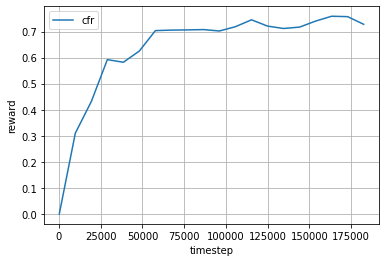

In [10]:
plot_curve(csv_path, fig_path, 'cfr')

Good job! Now you have your trained CFR agent on Leduc Hold'em!